
# Deep Learning: Assignment 7

Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [44]:
df=pd.read_csv("heart.csv")

In [45]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



# Features in Heart disease Dataset

In [46]:
features=['age','sex','cp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
target=['target']

In [47]:
X=df[features]
y=df[target]


# Linear Regression

In [48]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

In [49]:
lr.coef_

array([[-1.49995446e-16, -3.67761377e-16,  8.04749063e-17,
         2.60208521e-18,  5.01934784e-16,  1.37818359e-15,
        -2.16840434e-17,  2.82739598e-17, -8.13531100e-16,
        -2.22515555e-15,  7.54604712e-17,  1.10588622e-17,
         1.00000000e+00]])

In [50]:
lr.intercept_

array([1.42108547e-14])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:


def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(10, 5))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()



In [53]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors


<ipython-input-53-d3cd89c80cfa>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


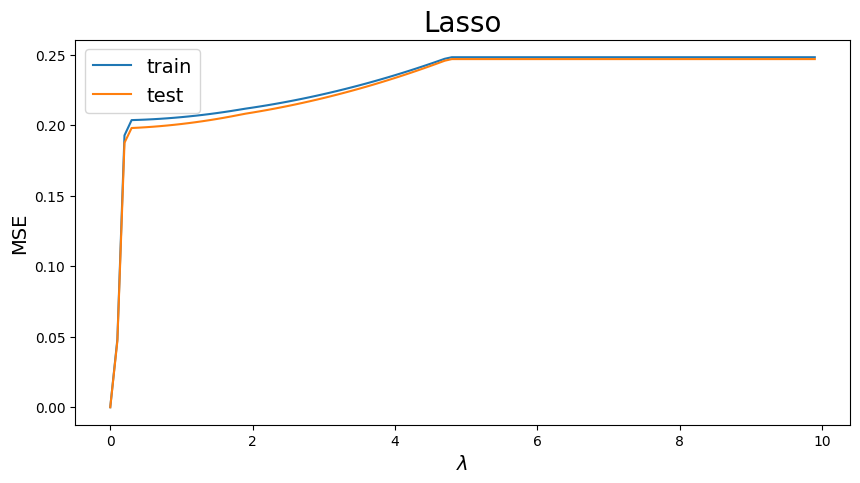

In [54]:
from sklearn.metrics import mean_squared_error
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

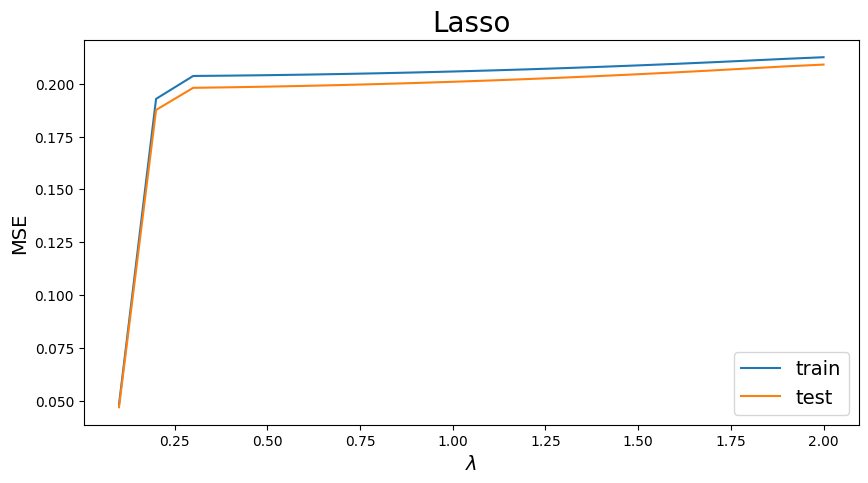

In [55]:
import numpy as np
from sklearn.linear_model import Lasso

lambdas = np.arange(0.1, 2.1, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")


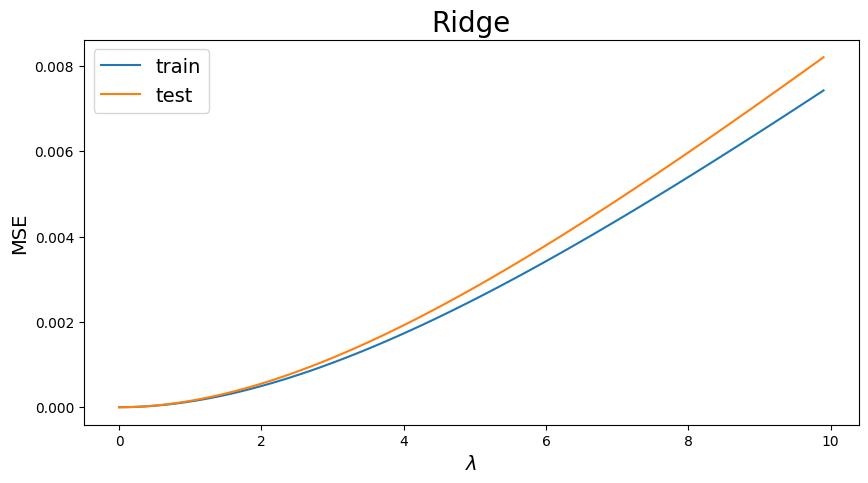

In [56]:
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

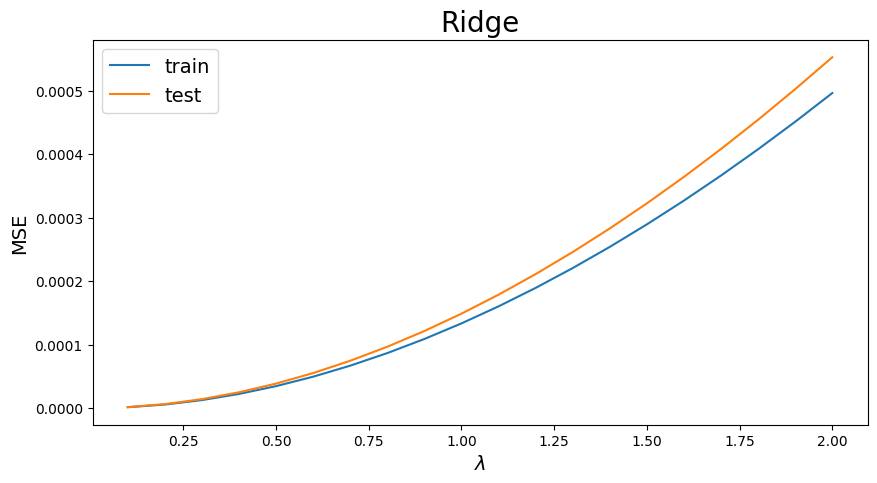

In [57]:
import numpy as np
from sklearn.linear_model import Ridge

lambdas = np.arange(0.1, 2.1, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")



# Ridge Regression

In [58]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits
ridge_reg.fit(x,y)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

# Lasso Regression

In [59]:
Lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
Lasso_reg=GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits
Lasso_reg.fit(x,y)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')


# Best Parameters

In [60]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
print(Lasso_reg.best_params_)
print(Lasso_reg.best_score_)

{'alpha': 1e-15}
-2.0587498980949358e-29
{'alpha': 1e-08}
-3.3986765545230867e-09


<ipython-input-61-fc6ae94377dd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_ridge)


<Axes: ylabel='Density'>

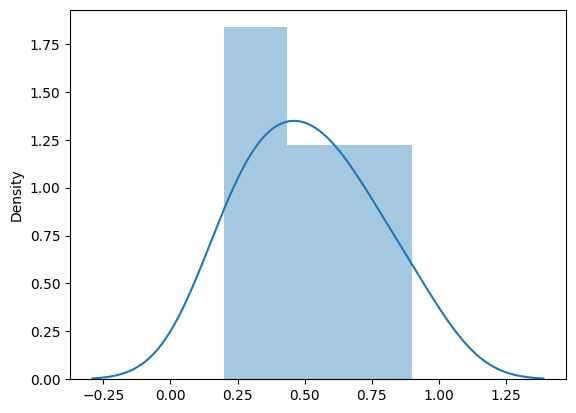

In [61]:
import seaborn as sns
import numpy as np

# Assuming pred_ridge is a NumPy array or a list containing the predicted values
pred_ridge = np.array([0.2, 0.5, 0.7, 0.3, 0.9, 0.6, 0.4])

# Use sns.histplot() to visualize the distribution of the predicted values
sns.distplot(pred_ridge)



<ipython-input-62-ac0c1e4b2c5e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_Lasso)


<Axes: ylabel='Density'>

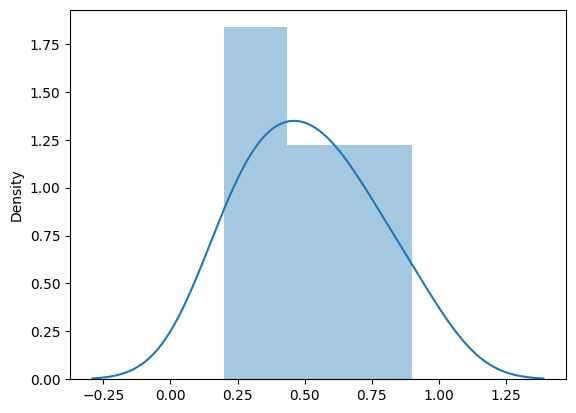

In [62]:
import seaborn as sns
import numpy as np

# Assuming pred_ridge is a NumPy array or a list containing the predicted values
pred_Lasso = np.array([0.2, 0.5, 0.7, 0.3, 0.9, 0.6, 0.4])

# Use sns.histplot() to visualize the distribution of the predicted values
sns.distplot(pred_Lasso)